In [1]:
import meld_graph
import meld_graph.models
import meld_graph.experiment
import meld_graph.dataset
import meld_graph.data_preprocessing
import meld_graph.evaluation


import importlib
importlib.reload(meld_graph)
importlib.reload(meld_graph.models)
importlib.reload(meld_graph.dataset)
importlib.reload(meld_graph.experiment)
importlib.reload(meld_graph.data_preprocessing)
importlib.reload(meld_graph.evaluation)

import logging
import os
import json

from meld_graph.dataset import GraphDataset, Oversampler
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
from meld_graph.training import Metrics
import numpy as np
from meld_graph.paths import EXPERIMENT_PATH

from meld_graph.evaluation import Evaluator



Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1


### testing the class

In [14]:
#initialise dataset

cohort= MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5', dataset='MELD_dataset_V6.csv')

# initialise subjects manually in list or get from a csv dataset
subject_ids, trainval_ids, test_ids  = cohort.read_subject_ids_from_dataset()

subjects = ['MELD_H17_3T_FCD_0092','MELD_H5_3T_C_0005','MELD_H2_15T_C_0002','MELD_H4_15T_FCD_0005',
'MELD_H4_3T_FCD_0008','MELD_H16_3T_FCD_042','MELD_H26_15T_FCD_0006','MELD_H4_3T_FCD_0041','MELD_H17_3T_FCD_0069',
 'MELD_H14_3T_FCD_0028','MELD_H3_3T_C_0029','MELD_H3_3T_C_0025','MELD_H17_3T_FCD_0129','MELD_H21_3T_FCD_0022',
 'MELD_H15_3T_C_0017','MELD_H4_15T_FCD_0022','MELD_H24_3T_FCD_0009','MELD_H12_3T_FCD_0029','MELD_H3_3T_C_0022',
 'MELD_H10_3T_FCD_0006', 'MELD_H17_3T_FCD_0037','MELD_H3_3T_C_0027','MELD_H5_3T_FCD_0016','MELD_H17_3T_FCD_0063','MELD_H5_3T_FCD_0023','MELD_H11_3T_FCD_0026',
 'MELD_H17_3T_FCD_0118','MELD_H2_3T_FCD_0002','MELD_H4_15T_C_0028','MELD_H14_3T_FCD_0006','MELD_H12_3T_FCD_0019','MELD_H14_3T_FCD_0005','MELD_H2_15T_FCD_0002',
 'MELD_H21_3T_FCD_0020','MELD_H24_3T_FCD_0027','MELD_H19_3T_C_010', 'MELD_H10_3T_C_0004','MELD_H3_3T_C_0064',
 'MELD_H17_3T_FCD_0123','MELD_H21_3T_FCD_0045','MELD_H3_3T_C_0002','MELD_H17_3T_FCD_0109',
 'MELD_H15_3T_C_0021','MELD_H11_3T_FCD_0038','MELD_H17_3T_FCD_0059']
 

features= [
          '.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.combat.on_lh.thickness.sm10.mgh',
          '.combat.on_lh.w-g.pct.sm10.mgh',
          '.combat.on_lh.sulc.sm5.mgh',
          '.combat.on_lh.curv.sm5.mgh',
          '.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.combat.on_lh.wm_FLAIR_1.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh',
          '.inter_z.intra_z.combat.on_lh.curv.sm5.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
          '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',]

# initiate params
params = {                
          "features":features,
          "augment_data": {}, 
          "lesion_bias":0,
          "lobes": False,
          "synthetic_data": {
              'run_synthetic': False,
              # 'n_subs': 200,
              # 'use_controls': True,
              # 'radius': 0.5,
              # 'n_subtypes': 25,
              # 'jitter_factor': 2,
              # 'bias': 1,
              # 'proportion_features_abnormal': 0.2,
              # 'proportion_hemispheres_lesional': 0.9,
            },
          "number_of_folds": 10,
          "preprocessing_parameters": {
              "scaling": None, 
              "zscore": '../data/feature_means.json',
            },
          "combine_hemis": None,
          }

#load dataset
dataset = GraphDataset(subjects, cohort, params, mode='test', 
output_levels=[3,4,5,6,7])


Loading and preprocessing test data


dataset using distance_maps


Z-scoring data for MELD_H17_3T_FCD_0092
Z-scoring data for MELD_H5_3T_C_0005
Z-scoring data for MELD_H2_15T_C_0002
Z-scoring data for MELD_H4_15T_FCD_0005
Z-scoring data for MELD_H4_3T_FCD_0008
Z-scoring data for MELD_H16_3T_FCD_042
Z-scoring data for MELD_H26_15T_FCD_0006
Z-scoring data for MELD_H4_3T_FCD_0041
Z-scoring data for MELD_H17_3T_FCD_0069
Z-scoring data for MELD_H14_3T_FCD_0028
Z-scoring data for MELD_H3_3T_C_0029
Z-scoring data for MELD_H3_3T_C_0025
Z-scoring data for MELD_H17_3T_FCD_0129
Z-scoring data for MELD_H21_3T_FCD_0022
Z-scoring data for MELD_H15_3T_C_0017
Z-scoring data for MELD_H4_15T_FCD_0022
Z-scoring data for MELD_H24_3T_FCD_0009
Z-scoring data for MELD_H12_3T_FCD_0029
Z-scoring data for MELD_H3_3T_C_0022
Z-scoring data for MELD_H10_3T_FCD_0006
Z-scoring data for MELD_H17_3T_FCD_0037
Z-scoring data for MELD_H3_3T_C_0027
Z-scoring data for MELD_H5_3T_FCD_0016
Z-scoring data for MELD_H17_3T_FCD_0063
Z-scoring data for MELD_H5_3T_FCD_0023
Z-scoring data for MELD

In [3]:
len(dataset)

4

### Load model and predict

In [15]:
# initialise models you want to run
EXPERIMENT_PATH='/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1'

model_name = 'random3'
model_path =  '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-12-13_finetune/dcd/fold_00/'

In [16]:
from pyexpat import model

    
#load experiment already trained using checkpoint path
model_base_path=model_path
checkpoint_path=os.path.join(EXPERIMENT_PATH, model_base_path)
exp = meld_graph.experiment.Experiment.from_folder(checkpoint_path)

# if checkpoint load model
if checkpoint_path:
    exp.load_model(
        checkpoint_path=os.path.join(checkpoint_path, "best_model.pt"),
        force=True,
    )

    

Initialised Experiment 22-12-13_finetune/dcd
Creating model
Loading model weights from checkpoint /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-12-13_finetune/dcd/fold_00/best_model.pt


In [7]:
from meld_graph.models import HexPool

output_levels=[3,4,5,6,7]


In [17]:
import torch
import torch_geometric



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# predict on data
data_loader = torch_geometric.loader.DataLoader(
    dataset,
    shuffle=False,
    batch_size=1,
)

data_dictionary = {}
prediction_array = {}
distance_map_array = {}
labels_array = {}
for level in output_levels:
    prediction_array[level] = []
    distance_map_array[level] = []
    labels_array[level] = []

for i, data in enumerate(data_loader):
    data = data.to(device)
    estimates = exp.model(data.x)
    if len(output_levels) != 0:
        # get labels pooling and downsample 
        labels_pooled = {7: data.y.squeeze()}
        for level in range(min(output_levels), 7)[::-1]:
            labels_pooled[level] = dataset.pool_layers[level](labels_pooled[level + 1])
        # get predictions pooling 
        predictions_pooled = {7: torch.exp(estimates['log_softmax'])[:,1]}
        for level in range(min(output_levels), 7)[::-1]:
            predictions_pooled[level] = torch.exp(estimates[f'ds{level}_log_softmax'])[:,1]
        # get distances pooling
        if 'distance_regression' in exp.network_parameters['training_parameters']['loss_dictionary'].keys():
            distance_map_pooled = {7:estimates['non_lesion_logits'][:,0]}
            for level in range(min(output_levels), 7)[::-1]:
                distance_map_pooled[level] = estimates[f'ds{level}_non_lesion_logits'][:,0]
        else: 
            distance_map =  {7:torch.full((len(predictions_pooled[7]),1), torch.nan)[:,0]}
            for level in range(min(output_levels), 7)[::-1]:
                distance_map_pooled[level] = torch.full((len(predictions_pooled[7]),1), torch.nan)[:,0]
    
        for level in range(min(output_levels), 8):
            prediction_array[level].append(predictions_pooled[level].detach().numpy())
            distance_map_array[level].append(distance_map_pooled[level].detach().numpy())
            labels_array[level].append(labels_pooled[level].numpy())


# pooled the cortex mask 
mask= {7:torch.from_numpy(dataset.cohort.cortex_mask)}
for level in range(min(output_levels), 7)[::-1]:
    mask[level] = dataset.pool_layers[level](mask[level + 1])

# concatenate left and right predictions and label
data_dictionary={}
if exp.data_parameters["combine_hemis"] is None:
    for level in range(min(output_levels), 8):
        prediction_array[level] = np.array(prediction_array[level])
        distance_map_array[level] = np.array(distance_map_array[level])
        labels_array[level] = np.array(labels_array[level])
        prediction_array[level] = (
            prediction_array[level][:, np.array(mask[level])]
            .flatten()
            .reshape((len(dataset.subject_ids), np.array(mask[level]).sum() * 2))
        )
        distance_map_array[level] = (
            distance_map_array[level][:, mask[level]]
            .flatten()
            .reshape((len(dataset.subject_ids), mask[level].sum() * 2))
        )
        labels_array[level] = (
            labels_array[level][:, mask[level]]
            .flatten()
            .reshape((len(dataset.subject_ids), mask[level].sum() * 2))
        )
    
        data_dictionary[level]={}
        for i, subj_id in enumerate(dataset.subject_ids):
            data_dictionary[level][subj_id] = {
                "input_labels": labels_array[level][i],
                "result": prediction_array[level][i],
                "distance_map":distance_map_array[level][i],
            }
    


In [18]:
### compute stats

from meld_graph.training import tp_fp_fn_tn, dice_coeff
import pandas as pd

threshold=0.5

df = {}
for level in range(min(output_levels), 8):
    df[level] = pd.DataFrame()
    for subject in data_dictionary[level].keys():
        prediction = data_dictionary[level][subject]["result"]
        labels = data_dictionary[level][subject]["input_labels"]
        group = labels.sum()!= 0

        detected = np.logical_and(prediction>threshold, labels).any()
        difference = np.setdiff1d(np.unique(prediction), np.unique(prediction[labels]))
        difference = difference[difference > 0]
        n_clusters = len(difference)
        patient_dice_vars = {"TP": 0, "FP": 0, "FN": 0, "TN": 0}
        mask = torch.as_tensor(np.array(prediction>threshold)).long()
        label = torch.as_tensor(np.array(labels.astype(bool))).long()
        dices = dice_coeff(torch.nn.functional.one_hot(mask, num_classes=2),label)
        patient_dice_vars["TP"], patient_dice_vars["FP"], patient_dice_vars["FN"],patient_dice_vars["TN"]=tp_fp_fn_tn(mask, label)
        patient_dice_vars["Dice non-lesion"], patient_dice_vars["Dice lesion"] = list(dices)
    
        sub_df = pd.DataFrame(
            np.array([subject, group, detected, patient_dice_vars["TP"].numpy(), patient_dice_vars["FP"].numpy(), patient_dice_vars["FN"].numpy(), patient_dice_vars["TN"].numpy(), patient_dice_vars["Dice lesion"].numpy(), patient_dice_vars["Dice non-lesion"].numpy()]).reshape(-1, 1).T,
            columns=["ID", "group", "detected", 'tp', 'fp', 'fn', 'tn', 'dice lesional', 'dice non-lesional'],
        )

        df[level] = pd.concat([df[level],sub_df])

In [27]:
df[7]

,ID,group,detected,tp,fp,fn,tn,dice lesional,dice non-lesional
0,MELD_H17_3T_FCD_0092,True,True,760,4,5015,288025,0.23245144,0.99136245
0,MELD_H5_3T_C_0005,False,False,0,0,0,293804,1.0,1.0
0,MELD_H2_15T_C_0002,False,False,0,0,0,293804,1.0,1.0
0,MELD_H4_15T_FCD_0005,True,True,212,20,3163,290409,0.11754921,0.9945497
0,MELD_H4_3T_FCD_0008,True,False,0,36,1508,292260,6.476684e-19,0.9973655
0,MELD_H16_3T_FCD_042,True,False,0,0,563,293241,1.776199e-18,0.99904096
0,MELD_H26_15T_FCD_0006,True,False,0,0,10946,282858,9.1357575e-20,0.98101836
0,MELD_H4_3T_FCD_0041,True,False,0,0,1259,292545,7.9428116e-19,0.9978528
0,MELD_H17_3T_FCD_0069,True,True,62,0,14047,279695,0.0087502645,0.97550386
0,MELD_H14_3T_FCD_0028,True,False,0,0,21063,272741,4.747662e-20,0.962822


### Look at results

In [28]:
# load results 

# stats
import pandas as pd

mean_dice_les=[]
mean_dice_les_all=[]
mean_dice_nonles_all=[]
sensitivity=[]
specificity=[]
for i,level in enumerate(output_levels[::-1]):  
   
    dfsub = df[level]    

    print(f'Model deepsurversion level {level}: ')
    
    mean_dice_les.append(dfsub[dfsub['group']=='True']['dice lesional'].astype('float').mean())
    print(f'mean dice lesional patient : {mean_dice_les[i]}')

    mean_dice_les_all.append(dfsub['dice lesional'].astype('float').mean())
    print(f'mean dice lesional all : {mean_dice_les_all[i]}')

    mean_dice_nonles_all.append(dfsub['dice non-lesional'].astype('float').mean())
    print(f'mean dice non lesional all : {mean_dice_nonles_all[i]}')

    sensitivity.append(len(dfsub[(dfsub['group']=='True') & (dfsub['tp'].astype('float')>0)])/len(dfsub[(dfsub['group']=='True')]))
    print(f'sensitivity patient : {sensitivity[i]}')

    specificity.append(len(dfsub[(dfsub['group']=='False') & (dfsub['fp'].astype('float')==0)])/len(dfsub[(dfsub['group']=='False')]))
    print(f'specificity controls : {specificity[i]}')

    print(f'\n')
    
    

Model deepsurversion level 7: 
mean dice lesional patient : 0.076969637953125
mean dice lesional all : 0.34362285365555556
mean dice non lesional all : 0.9958684039999999
sensitivity patient : 0.28125
specificity controls : 1.0


Model deepsurversion level 6: 
mean dice lesional patient : 0.06109746825000001
mean dice lesional all : 0.3323359774222222
mean dice non lesional all : 0.9955555966666665
sensitivity patient : 0.1875
specificity controls : 1.0


Model deepsurversion level 5: 
mean dice lesional patient : 0.0634192209375
mean dice lesional all : 0.33398700155555555
mean dice non lesional all : 0.9948813353333333
sensitivity patient : 0.15625
specificity controls : 1.0


Model deepsurversion level 4: 
mean dice lesional patient : 0.08253596125000001
mean dice lesional all : 0.347581128
mean dice non lesional all : 0.9935818955555555
sensitivity patient : 0.1875
specificity controls : 1.0


Model deepsurversion level 3: 
mean dice lesional patient : 0.13141238687500004
mean dice

Text(0.5, 1.0, 'dice lesion patient')

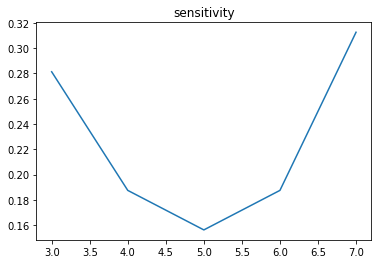

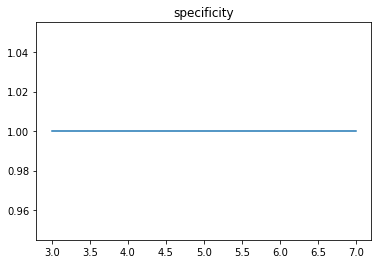

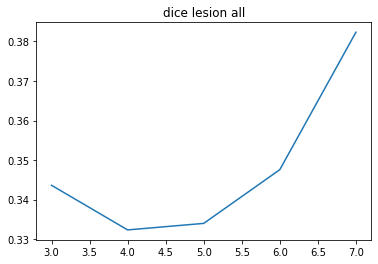

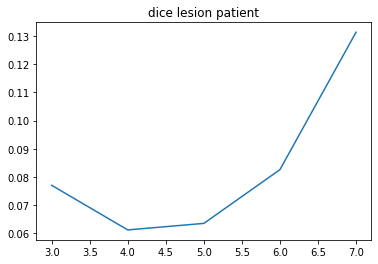

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(output_levels,sensitivity)
plt.title('sensitivity')

plt.figure()
plt.plot(output_levels,specificity)
plt.title('specificity')

plt.figure()
plt.plot(output_levels,mean_dice_les_all)
plt.title('dice lesion all')

plt.figure()
plt.plot(output_levels,mean_dice_les)
plt.title('dice lesion patient')



In [26]:
df



,ID,group,detected,tp,fp,fn,tn,dice lesional,dice non-lesional
0,MELD_H4_15T_FCD_0002,True,True,675,421,6193,286515,0.169513,0.98859


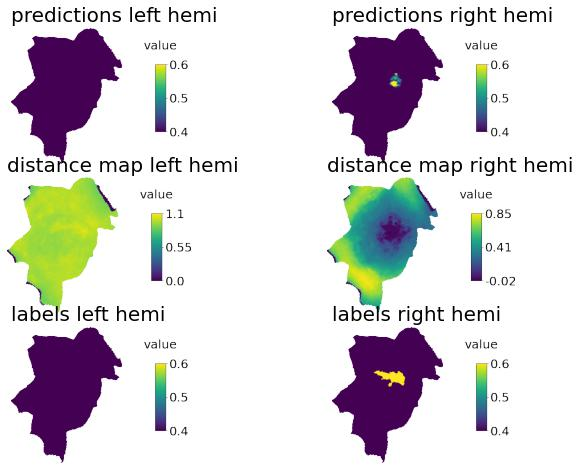

In [24]:
from IPython.display import Image
image_file = os.path.join(EXPERIMENT_PATH,f'22-12-12_real_evaluation_test_distance/{model_name}', 'results','images', 'MELD_H4_15T_FCD_0002.jpg')
Image(filename=image_file) 

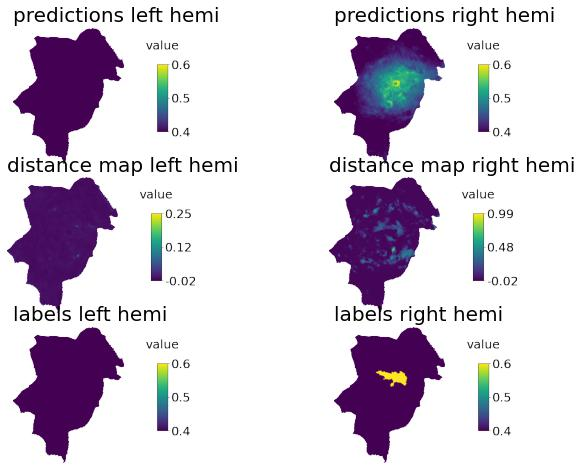

## Evaluation using baseline model

In [ ]:
# 
import torch
exp.load_model(checkpoint_path='/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-07-29_synth_3layer/finetune_radius0.2/fold_00/best_model.pt', 
               force=True )

In [ ]:
data_loader = torch_geometric.loader.DataLoader(dataset,
            shuffle=False, )

In [ ]:
#predict 
import torch_geometric.data
from meld_graph.training import Metrics

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
data_loader = torch_geometric.loader.DataLoader(dataset,
            shuffle=False, batch_size=2)
metrics = Metrics(params['metrics'])  # for keeping track of running metrics
for data in data_loader:
    print('loader')
    data = data.to(device)
    estimates = exp.model(data.x)
    labels = data.y.squeeze()   
    # metrics
    pred = torch.argmax(estimates[0], axis=1)
    # update running metrics
    metrics.update(pred, labels)

metrics.get_aggregated_metrics()

In [ ]:
#plot lesion
import matplotlib_surface_plotting as msp
from meld_graph.icospheres import IcoSpheres

#initialise the icosphere
icos=IcoSpheres(conv_type='SpiralConv')
ico_index=7
ico_ini = icos.icospheres[ico_index]

#plot example of feature on icosphere for 1 subject
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              pred.numpy()[0:163842], 
              parcel=labels.numpy()[0:163842], 
              parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[50,250], 
                 )


In [ ]:
#plot lesion
import matplotlib_surface_plotting as msp
from meld_graph.icospheres import IcoSpheres

#initialise the icosphere
icos=IcoSpheres(conv_type='SpiralConv')
ico_index=7
ico_ini = icos.icospheres[ico_index]

#plot example of feature on icosphere for 1 subject
index = 3
feat=1
features_subj, labels_subj = dataset.data_list[index]
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              features_subj[:,feat], 
              parcel=labels_subj, 
              parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[150,250], 
                 )
